<a href="https://colab.research.google.com/github/NeoZ666/Python-Mini-Project/blob/main/Python_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#Loading the Amaozon stock price.
df = pd.read_csv("AMZN.csv")

In [ ]:
#Displaying first few rows of Dataframe.
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-05,167.741501,168.110504,163.266006,164.054993,164.054993,53728000
1,2022-04-06,161.650497,162.199997,157.254501,158.755997,158.755997,79056000
2,2022-04-07,158.399994,160.078995,154.511505,157.784500,157.784500,68136000
3,2022-04-08,156.750000,157.368500,154.231003,154.460495,154.460495,46002000
4,2022-04-11,152.712997,154.136505,150.534500,151.121994,151.121994,52112000


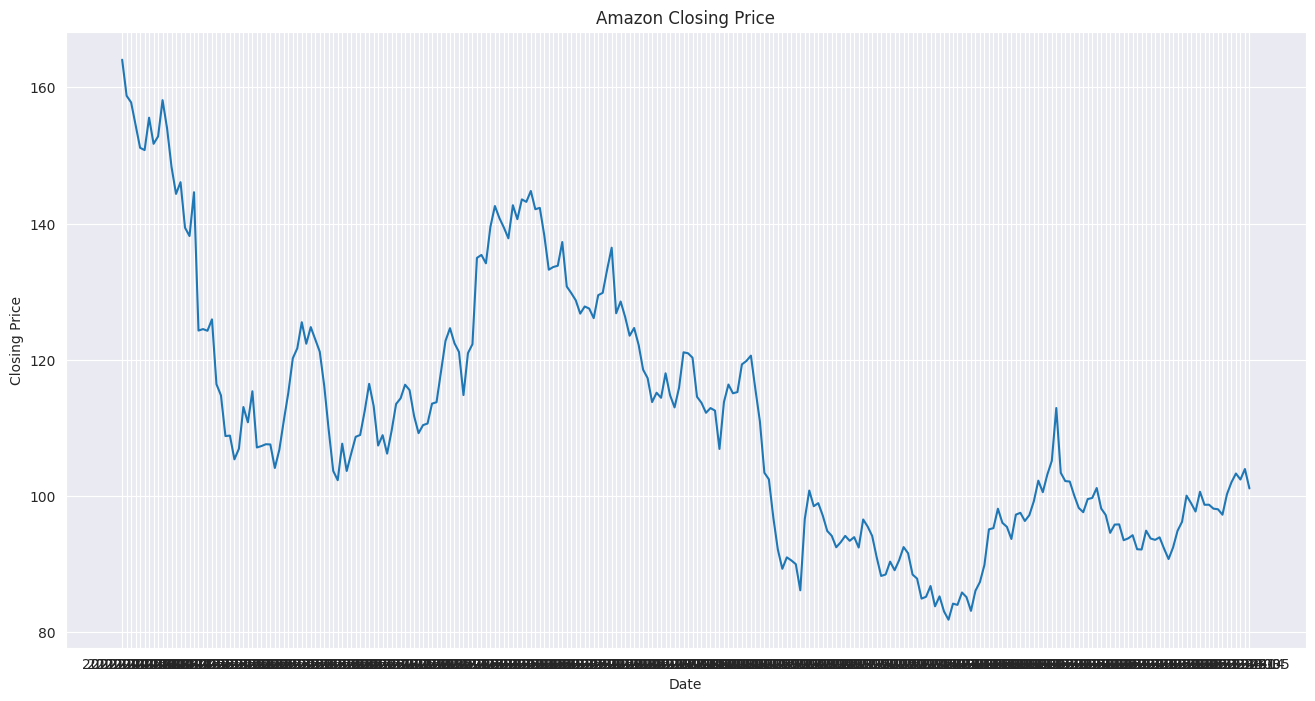

In [ ]:
#Ploting the closing price of Amazon's stock over time using line chart.
sns.set_style("darkgrid")
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df['Close'])
plt.title('Amazon Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()
#Setting the style, size of plot .

In [ ]:
#Creating DataFrame that contains only the date and closing price column.
data = df.filter(['Date','Close'])

In [ ]:
#Convert Date column to a datetime object.
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
#Creating a new column called 'Days' i.e. number of days since first day in the dataset
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

In [ ]:
#Displaying first few rows of DataFrame.
data.head()

,Date,Close,Days
0,2022-04-05,164.054993,0
1,2022-04-06,158.755997,1
2,2022-04-07,157.784500,2
3,2022-04-08,154.460495,3
4,2022-04-11,151.121994,6


In [ ]:
#Splitting the data into training and testing.
#This code splits the data into 80% training data and 20% testing data.
X_train, X_test, y_train, y_test = train_test_split(data['Days'], data['Close'], test_size=0.2, random_state=0)

In [ ]:
#Reshaping the training and testing data.
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [ ]:
#Creating a liner regression model and train it on the training model.
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Prediction on the testing data.
y_pred = regressor.predict(X_test)

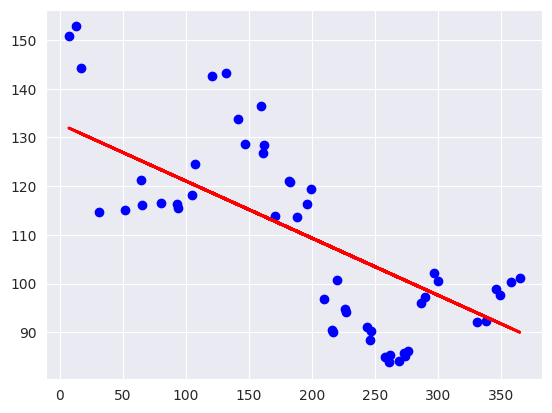

In [ ]:
#Plotting the actual closing price of Amazon's stock on the testing data and predicted closing price
#of Amazon's stock on the testing data using a scatter plot.
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)